In [3]:
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

Load Data

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 0s 0us/step


Pad Examples

In [5]:
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [6]:
x_train = pad_sequences(x_train, value = word_index['the'], padding = 'post', maxlen = 256)
x_test = pad_sequences(x_test, value = word_index['the'], padding = 'post', maxlen = 256)

Create Model

In [7]:
model = Sequential([
    Embedding(10000, 16),
    GlobalAveragePooling1D(),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160289 (626.13 KB)
Trainable params: 160289 (626.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train Model

In [15]:
h = model.fit(
    x_train, y_train,
    validation_split = 0.2,
    epochs = 20,
    verbose = False
)

Evaluate Training

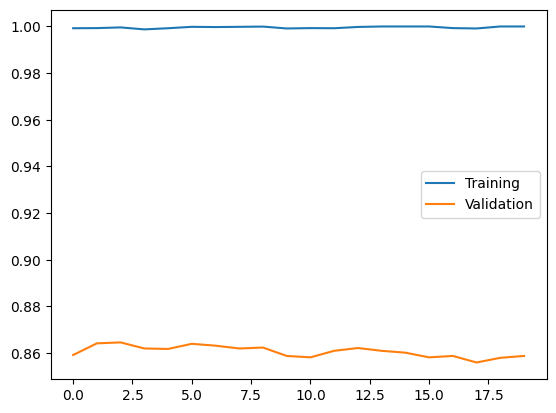

In [16]:
%matplotlib inline
plt.plot(range (E), h.history['acc'], label = 'Training')
plt.plot(range (E), h.history['val_acc'], label = 'Validation')
plt.legend()
plt.show()

Evaluate Test

In [17]:
loss, acc = model.evaluate(x_test, y_test)
print('Test set accuracy: ', acc * 100)

782/782 [==============================] - 2s 3ms/step - loss: 1.8559 - acc: 0.8330
Test set accuracy:  83.30000042915344


Example Prediction

In [18]:
p = model.predict(np.expand_dims (x_test[0], axis = 0))
class_names = ['Negative', 'Positive']
print(class_names[np.argmax(p[0])])

1/1 [==============================] - 0s 49ms/step
Negative
